In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pwd

'/Users/andrenovikov/Documents/Repos/Happiness-Team/Code'

In [3]:
df = pd.read_csv('/Users/andrenovikov/Documents/Repos/Happiness-Team/Data/world-happiness-report_clean.csv')

In [4]:
df.head()

,Unnamed: 0,country_name,year,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


### Comment on NaN values

We decide to leave the null values for now as only the ladder_score is relevant for our analysis so far.

The remaining data will be provided from the WHO data set.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2156 non-null   int64  
 1   country_name                  2156 non-null   object 
 2   year                          2156 non-null   int64  
 3   ladder_score                  2156 non-null   float64
 4   logged_gdp_per_capita         2127 non-null   float64
 5   social_support                2143 non-null   float64
 6   healthy_life_expectancy       2104 non-null   float64
 7   freedom_to_make_life_choices  2125 non-null   float64
 8   generosity                    2074 non-null   float64
 9   perceptions_of_corruption     2052 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 168.6+ KB


In [6]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df.head()

,country_name,year,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [8]:
numeric = df.select_dtypes(include = np.number)
numeric.head()

,year,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


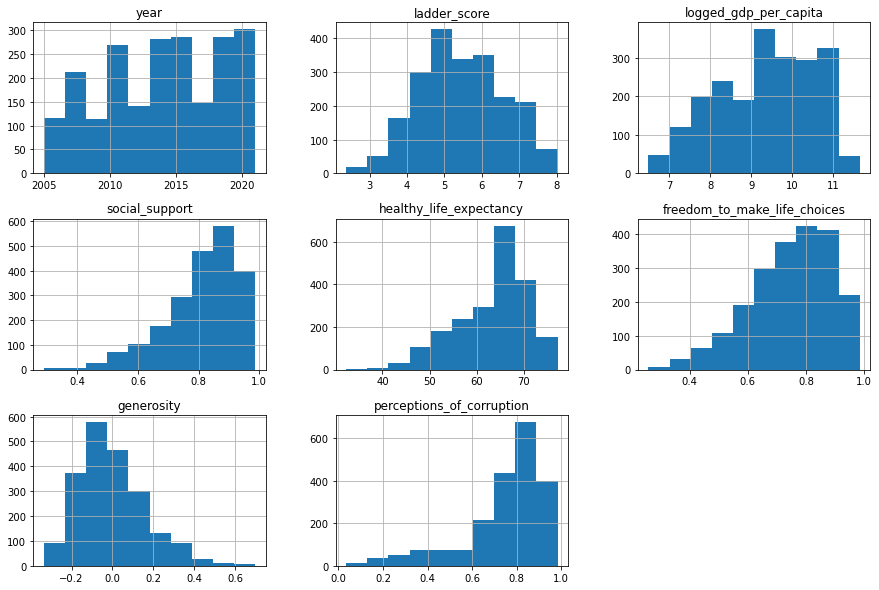

In [9]:
numeric.hist(bins = 10 ,figsize = (15,10));

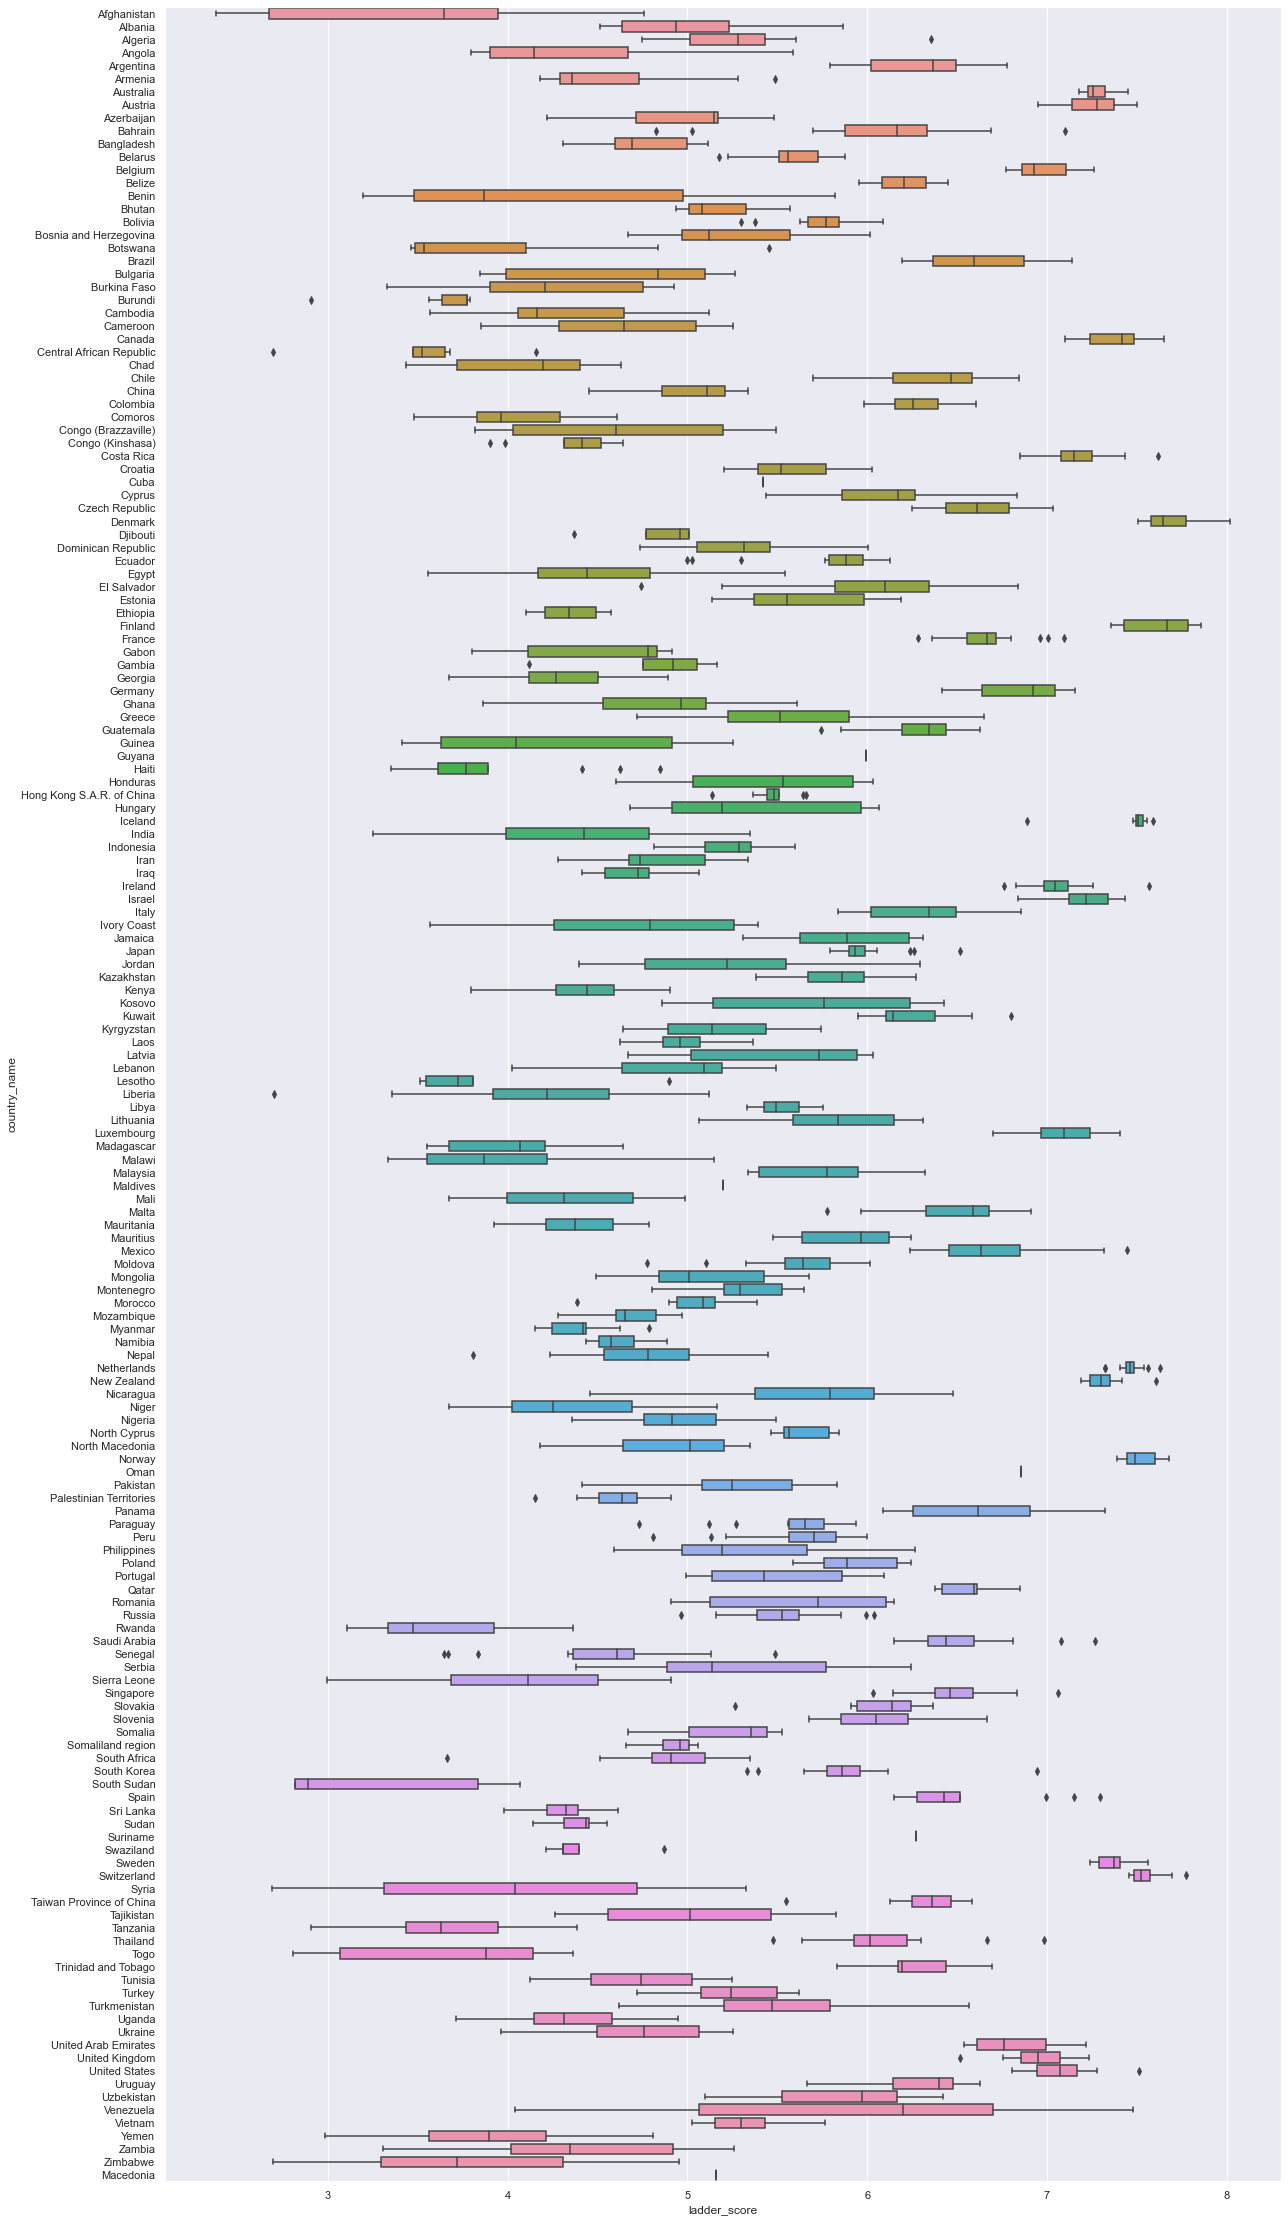

In [10]:
sns.set(rc={'figure.figsize':(20,40)})
sns.boxplot(data = df, y = 'country_name', x = 'ladder_score');

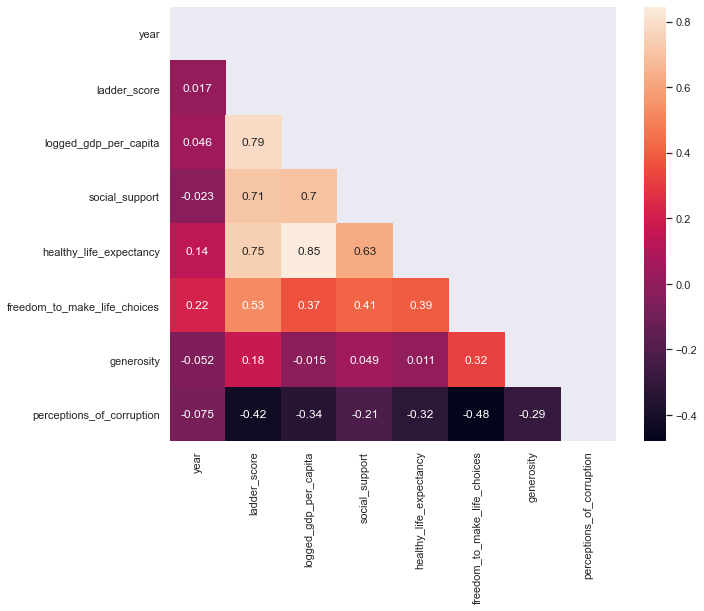

In [11]:
corr_matrix = df.corr(method = 'pearson')
fig, ax = plt.subplots (figsize = (10,8))
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
ax = sns.heatmap(corr_matrix, mask = mask, annot = True)
plt.show()

In [12]:
new_var_mean_val=np.mean(df['perceptions_of_corruption'])
df['perceptions_of_corruption'] =df['perceptions_of_corruption'].fillna(new_var_mean_val)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  2156 non-null   object 
 1   year                          2156 non-null   int64  
 2   ladder_score                  2156 non-null   float64
 3   logged_gdp_per_capita         2127 non-null   float64
 4   social_support                2143 non-null   float64
 5   healthy_life_expectancy       2104 non-null   float64
 6   freedom_to_make_life_choices  2125 non-null   float64
 7   generosity                    2074 non-null   float64
 8   perceptions_of_corruption     2156 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 151.7+ KB


In [14]:
new_gdp_mean_val=np.mean(df['logged_gdp_per_capita'])
df['logged_gdp_per_capita'] =df['logged_gdp_per_capita'].fillna(new_gdp_mean_val)

In [15]:
new_generosity_mean_val=np.mean(df['generosity'])
df['generosity'] =df['generosity'].fillna(new_generosity_mean_val)

In [16]:
new_le_mean_val=np.mean(df['healthy_life_expectancy'])
df['healthy_life_expectancy'] =df['healthy_life_expectancy'].fillna(new_generosity_mean_val)

In [17]:
for key in numeric.keys():
    numeric[key] =numeric[key].fillna(np.mean(numeric[key]))

<ipython-input-17-9a6c13a3f19e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric[key] =numeric[key].fillna(np.mean(numeric[key]))


In [18]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          2156 non-null   int64  
 1   ladder_score                  2156 non-null   float64
 2   logged_gdp_per_capita         2156 non-null   float64
 3   social_support                2156 non-null   float64
 4   healthy_life_expectancy       2156 non-null   float64
 5   freedom_to_make_life_choices  2156 non-null   float64
 6   generosity                    2156 non-null   float64
 7   perceptions_of_corruption     2156 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 134.9 KB


In [21]:
numeric.insert(0, 'country_name', df['country_name'])

In [22]:
numeric.head()

,country_name,year,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


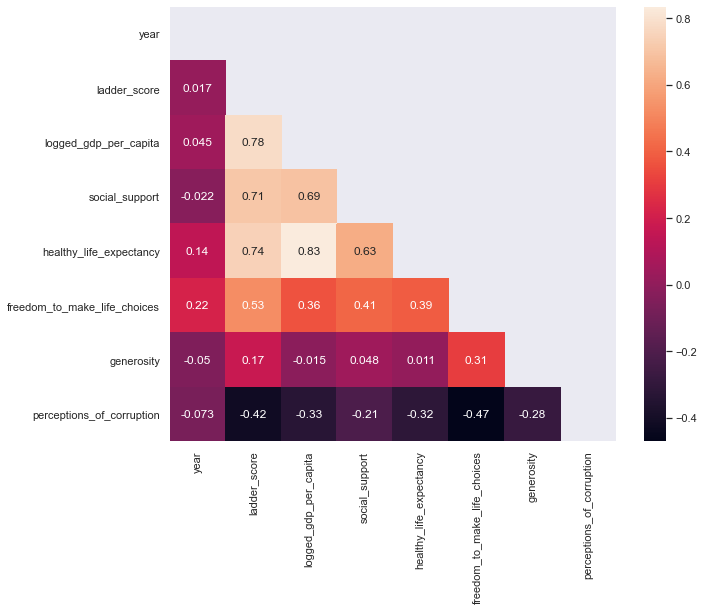

In [23]:
corr_matrix = numeric.corr(method = 'pearson')
fig, ax = plt.subplots (figsize = (10,8))
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
ax = sns.heatmap(corr_matrix, mask = mask, annot = True)
plt.show()

In [27]:
numeric.to_csv('happy_final.csv', index = False)

In [28]:
ls

Data EDA.ipynb                      happy
Happiness - vaccination data.ipynb  happy_final
Happy.ipynb                         happy_final.csv
Happy_Axana.ipynb
